# K-means

## Exemplo simples: gerando conjunto de dados sintético

In [3]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# gerando dataset sintético bi-dimensional
X, y = make_blobs(n_samples=200, random_state=2)

# Contruindo o modelo de agrupamento
kmeans = KMeans( n_clusters=5)
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [4]:
print("Itens rotulados:\n{}".format(kmeans.labels_))

Itens rotulados:
[3 2 2 1 2 3 0 1 2 1 2 3 2 1 4 4 3 2 3 2 2 2 2 2 4 2 2 1 0 3 3 3 1 0 2 2 1
 4 2 1 0 1 3 3 2 4 0 4 3 0 4 0 0 4 2 2 0 2 3 0 1 1 2 4 4 2 4 3 1 0 2 3 2 4
 0 4 2 4 2 2 3 3 1 3 3 4 0 4 0 2 3 4 2 0 1 1 4 1 2 0 2 0 2 4 0 3 4 1 2 1 1
 1 3 1 4 2 3 3 0 1 2 3 0 2 2 3 1 0 3 2 3 0 1 1 3 1 2 4 3 0 2 3 4 2 3 4 1 4
 1 2 3 0 2 1 2 0 0 0 2 2 4 1 0 0 2 0 4 2 2 0 0 3 3 4 1 1 0 0 2 3 0 2 3 0 1
 2 2 4 1 2 1 1 3 2 1 0 2 1 0 0]


Este exemplo, usa uma biblioteca mglearn disponível em:
https://github.com/amueller/introduction_to_ml_with_python

Intalação: pip install mglearn

De autoria de:
MÜLLER, Andreas C.; GUIDO, Sarah. Introduction to machine learning with Python: a guide for data scientists. " O'Reilly Media, Inc.", 2016.

Para facilitar plotagem e carregamento de dados. Se você estiver interessado, você pode procurar todas as funções no repositório, mas os detalhes do módulo mglearn não são realmente importantes para o material deste livro. Se você vir uma chamada para mglearn no código, geralmente é uma maneira de fazer uma imagem bonita rapidamente, ou
colocar as mãos em alguns dados interessantes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 5.1 MB/s eta 0:00:00


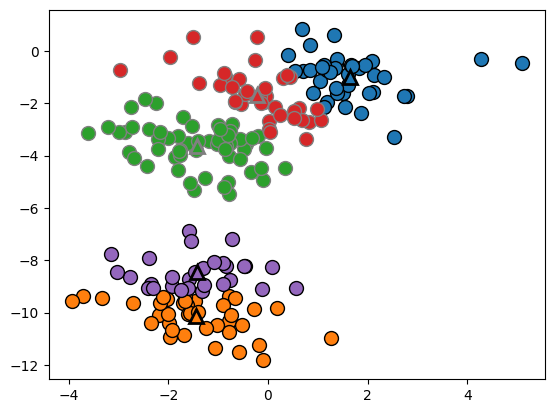

In [5]:
!pip install mglearn
import mglearn

mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2, 3, 4],
markers='^', markeredgewidth=2)



# Exemplo usando dataset Mall_customers.csv**


Disponível em: https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python
Este dataset contém as informações básicas (ID, idade, sexo, renda, pontuação de gastos) sobre os clientes

In [6]:
#Importante as bibliotecas
import pandas as pd
import numpy as np
#import datetime as dt
import seaborn as sns  # biblioteca para visualização de dados baseada em matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
#instalando biblioteca não localizada utilizada para definir a quantidade de centroides
!pip install kneed
from kneed import KneeLocator #biblioteca usada para encontrar o melhor K


In [8]:
# Carregando os dataset do drive

#from google.colab import drive
#drive.mount('/content/drive')
#%cd /content/drive/My Drive/DEINF/2022_CLASSIFICAO_PREDICAO_PYTHON/
#%cd /content/drive/My Drive/Colab Notebooks/
#df = pd.read_csv('Mall_Customers.csv')

# Carregando o dataset diretamente no gitlab

df = pd.read_csv('https://gitlab.com/jdallyson/curso_bi/-/raw/main/datasets/Mall_Customers.csv')

df.head(20)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


### Removendo CustomerID

In [9]:
df = df.drop(columns=['CustomerID'])

In [10]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [11]:
from sklearn.preprocessing import OrdinalEncoder
#Tranforma os atributo Gender em valor numérico
enc = OrdinalEncoder()
df[["Gender"]] = enc.fit_transform(df[["Gender"]])

In [12]:
#Retorna a estatística descritiva dos dados
df.describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,0.440000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,0.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


In [13]:
df.head(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,19,15,39
1,1.0,21,15,81
2,0.0,20,16,6
3,0.0,23,16,77
4,0.0,31,17,40
5,0.0,22,17,76
6,0.0,35,18,6
7,0.0,23,18,94
8,1.0,64,19,3
9,0.0,30,19,72


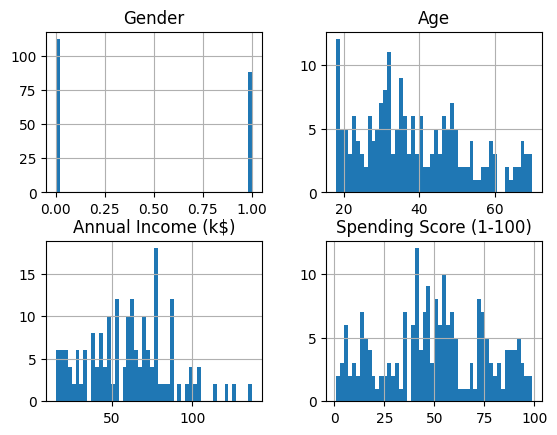

In [14]:
histogram = df.hist(bins=50)

**Identificando o número ótimo de grupos**

Como mencionei antes, o algoritmo k-means requer a definição do K, o número de clusters ao executá-lo. Em vez de apenas escolher um valor aleatório, ou escolher um que pareça fazer sentido do ponto de vista comercial, na verdade há uma variedade de técnicas especiais que podmeos usar para selecionar o k ideal. O método do cotovelo é provavelmente o mais comum.

O método do cotovelo é uma técnica de visualização de dados para selecionar o número certo de k significa centroides a serem usados ​​ao criar seu modelo. Ele funciona procurando o ponto de inflexão, ou cotovelo, em um gráfico da soma do erro quadrado (SSE) para cada número de clusters. O ponto de inflexão, onde ocorre a flexão no joelho ou cotovelo, informa o k ideal a ser usado, pois adicionar mais clusters deixa de melhorar o desempenho.

Para criar um gráfico de cotovelo, definiremos uma função que podemos reutilizar. Isso normaliza os dados usando nossa função preprocess() e cria um dicionário chamado sse no qual armazenaremos o SSE para cada modelo. Em seguida, ajustamos 20 k significa modelos usando um k diferente a cada vez, registrando o k no dicionário sse à medida que avançamos. No final, criamos um pointplot() Seaborn para mostrar o gráfico de cotovelo para cada número de clusters.

A menor desvantagem do gráfico de cotovelo é que, em alguns conjuntos de dados, pode ser complicado identificar o ponto de inflexão exato que representa o joelho ou o cotovelo. No gráfico abaixo, parece estar entre 4 e 6, então podemos testar cada k e ver qual funciona melhor para nossas necessidades de negócios.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

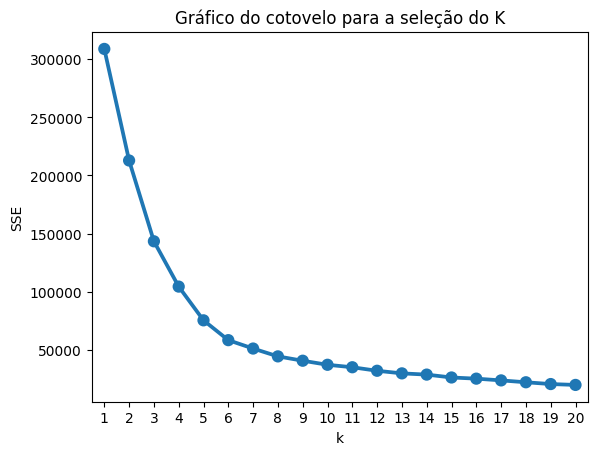

In [15]:
def elbow_plot(df):
    """Cria gráfico do cotovelo a partir dos dados normalizados"""

    sse = {}

    for k in range(1, 21):
        kmeans = KMeans(n_clusters=k, random_state=1)
        kmeans.fit(df)
        sse[k] = kmeans.inertia_

    plt.title('Gráfico do cotovelo para a seleção do K')
    plt.xlabel('k')
    plt.ylabel('SSE')
    sns.pointplot(x=list(sse.keys()),
                 y=list(sse.values()))
    plt.show()

elbow_plot(df)

### Outra forma de visualizar o gráfico do cotovelo

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

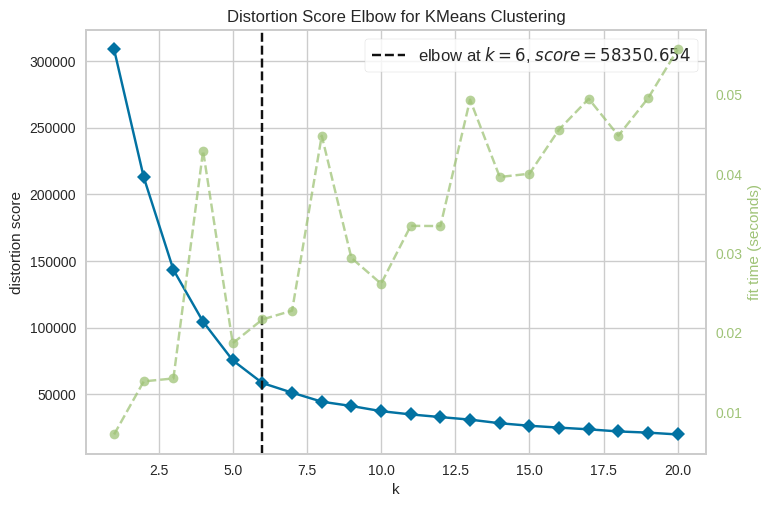

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [16]:
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1,21))

visualizer.fit(df)        # Fit the data to the visualizer
visualizer.show()

### Outra abordagem para definir o k ótimo

A outra abordagem, que resolve as dificuldades em identificar manualmente o ponto de inflexão no gráfico do cotovelo, é usar uma abordagem computacional para encontrar o k ótimo. Um dos mais fáceis de usar é o algoritmo Kneedle, que é implementado em Python em um pacote chamado kneed.

A abordagem para isso é muito parecida com o método do cotovelo. Normalizamos os dados, então ajustamos o modelo de k-means com um k diferente a cada vez e armazenamos os valores em sse. Em seguida, usamos o método KneeLocator() do pacote kneed para identificar matematicamente o ponto de inflexão. Além disso, ajustamos a função abaixo para permitir aumentar ou diminuir k para tentar valores em ambos os lados.

In [17]:
def find_k(df, increment=0, decrement=0):
    """Encontra o número ótimo de grupos"""

    sse = {}

    for k in range(1, 21):
        kmeans = KMeans(n_clusters=k, random_state=1)
        kmeans.fit(df)
        sse[k] = kmeans.inertia_

    kn = KneeLocator(
                 x=list(sse.keys()),
                 y=list(sse.values()),
                 curve='convex',
                 direction='decreasing'
                 )
    k = kn.knee + increment - decrement
    return k

k = find_k(df)

print(k)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

6


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


##Aplicando o K-means

Finalmente, podemos criar uma função para executar nosso modelo de agrupamento.
A função run_kmeans() recebe três argumentos: o dataframe Pandas que queremos usar para clustering e argumentos opcionais para incrementar ou decrementar o k fornecido pelo algoritmo Kneedle.

A função primeiro log transforma os dados, depois os dimensiona e, em seguida, usa find_k() para testar 20 valores k diferentes e determinar o número ideal de clusters. Finalmente, ele ajusta o modelo de k means usando o k ótimo e retorna o dataframe original com os rótulos de cluster anexados.

In [18]:
def run_kmeans(df, increment=0, decrement=0):
    """Executa KMeans, incluindo o pre-processamento dos dados e
    automatiza a definização do parâmetro K
    """
    k = find_k(df, increment, decrement)
    kmeans = KMeans(n_clusters=k,
                    random_state=1)
    kmeans.fit(df)

    return df.assign(cluster=kmeans.labels_)

In [19]:
df_cluster = run_kmeans(df, 0, 0)
print(df_cluster)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

     Gender  Age  Annual Income (k$)  Spending Score (1-100)  cluster
0       1.0   19                  15                      39        4
1       1.0   21                  15                      81        5
2       0.0   20                  16                       6        4
3       0.0   23                  16                      77        5
4       0.0   31                  17                      40        4
..      ...  ...                 ...                     ...      ...
195     0.0   35                 120                      79        2
196     0.0   45                 126                      28        1
197     1.0   32                 126                      74        2
198     1.0   32                 137                      18        1
199     1.0   30                 137                      83        2

[200 rows x 5 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


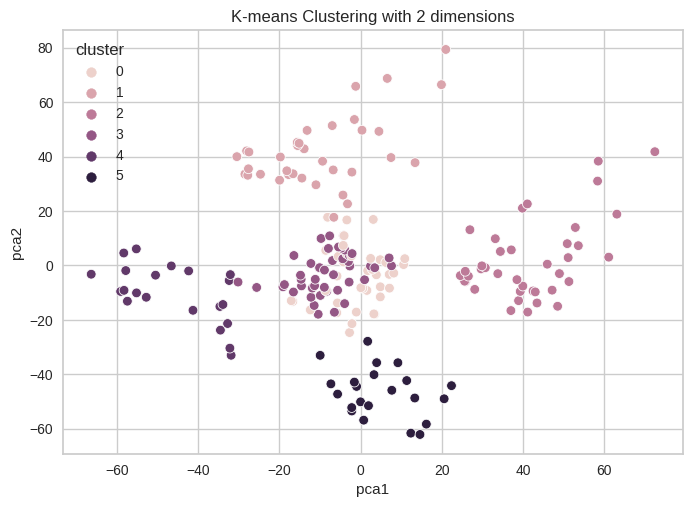

In [22]:
### Visualizando o resultado do K-means com n atributos em um espaço bi-dimensional

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


pca_num_components = 2

reduced_data = PCA(n_components=pca_num_components).fit_transform(df)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=df_cluster['cluster'], data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()